In [148]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [149]:
#Loading HR Analytics database
df=pd.read_csv("Covid-Data.csv")
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,4/12/2020 23:18,32.3182,-86.9023,3563.0,93.0,NaN,3470.0,1.0,75.988020,21583.0,437.0,2.610160,84000001.0,USA,460.300152,12.264945
1,Alaska,US,4/12/2020 23:18,61.3707,-152.4044,272.0,8.0,66.0,264.0,2.0,45.504049,8038.0,31.0,2.941176,84000002.0,USA,1344.711576,11.397059
2,Arizona,US,4/12/2020 23:18,33.7298,-111.4312,3542.0,115.0,NaN,3427.0,4.0,48.662422,42109.0,NaN,3.246753,84000004.0,USA,578.522286,NaN
3,Arkansas,US,4/12/2020 23:18,34.9697,-92.3731,1280.0,27.0,367.0,1253.0,5.0,49.439423,19722.0,130.0,2.109375,84000005.0,USA,761.753354,10.156250
4,California,US,4/12/2020 23:18,36.1162,-119.6816,22795.0,640.0,NaN,22155.0,6.0,58.137726,190328.0,5234.0,2.812020,84000006.0,USA,485.423868,22.961176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,Virginia,US,9/3/2020 4:30,37.7693,-78.1700,122518.0,2641.0,15319.0,104558.0,51.0,1435.390162,1610691.0,NaN,2.155602,84000051.0,USA,18870.451810,NaN
8292,Washington,US,9/3/2020 4:30,47.4009,-121.4905,75377.0,1935.0,NaN,73442.0,53.0,989.862891,1480039.0,NaN,2.567096,84000053.0,USA,19436.110260,NaN
8293,West Virginia,US,9/3/2020 4:30,38.4912,-80.9545,10658.0,233.0,8266.0,2159.0,54.0,594.705680,441585.0,NaN,2.186151,84000054.0,USA,24639.998840,NaN
8294,Wisconsin,US,9/3/2020 4:30,44.2685,-89.6165,77129.0,1142.0,68641.0,7346.0,55.0,1324.686549,1273730.0,NaN,1.480636,84000055.0,USA,21876.246260,NaN


In [150]:
#checking the datatype of each column 
print(df.dtypes)
#Province state, country region,last update, and IS03 are object type data and rest are float type data
print(df.info())

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed               float64
Deaths                  float64
Recovered               float64
Active                  float64
FIPS                    float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                     float64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        8294 non-null   object 
 1   Country_Region        8294 non-null   object 
 2   Last_Update           8284 non-null   object 
 3   Lat                   8008 non-null   float

In [151]:
df.keys()

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [152]:
#checking the shape of data set
df.shape

(8296, 18)

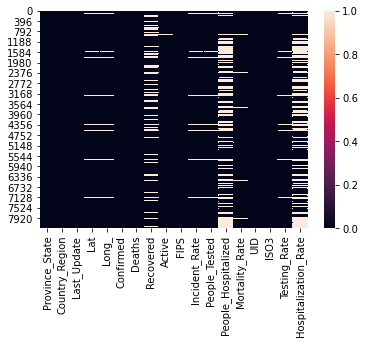

In [153]:
#checking null values using heat map
sns.heatmap(df.isnull())
#we can see that their is null values present in Lat,Recovered,People test,people hospitalized,mortality rate 
#testing rate and hospitalization rate

In [154]:
df.isnull().sum()

Province_State             2
Country_Region             2
Last_Update               12
Lat                      288
Long_                    288
Confirmed                  2
Deaths                     2
Recovered               1853
Active                    19
FIPS                       3
Incident_Rate            288
People_Tested            288
People_Hospitalized     3200
Mortality_Rate           145
UID                        2
ISO3                       2
Testing_Rate             288
Hospitalization_Rate    3201
dtype: int64

In [155]:
#dropping the nan values 
df.dropna(how='any',inplace=True)

In [156]:
df.shape

(4278, 18)

In [157]:
c=df["Confirmed"].sum()
print("Total confirmed cases =",c)

print("\n_______________________________________\n")

r=df["Recovered"].sum()
print("Total Recovered cases= ",r)

print("\n_______________________________________\n")

d=df["Deaths"].sum()
print("Total Deaths cases=",d)

Total confirmed cases = 178282214.0

_______________________________________

Total Recovered cases=  61202571.0

_______________________________________

Total Deaths cases= 9121790.0


In [158]:
covid={" Cases":["Confirmed","Recovered","Deaths"],"Numbers":[178282214.0, 61202571.0,9121790.0]}
df1=pd.DataFrame(covid)
df1

,Cases,Numbers
0,Confirmed,178282214.0
1,Recovered,61202571.0
2,Deaths,9121790.0


In [159]:
df['ISO3'].value_counts()

USA    4212
MNP      50
GUM      16
Name: ISO3, dtype: int64

# Exploratory Data Analysis

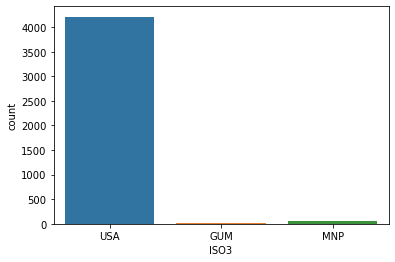

In [160]:
sns.countplot(df['ISO3']) 

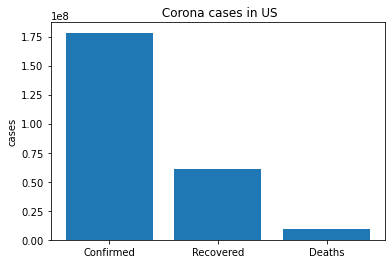

In [161]:
x=df1.iloc[:,0]
y=df1.iloc[:,-1]
plt.bar(x,y)
plt.ylabel("cases")
plt.title(" Corona cases in US")
 
plt.show()

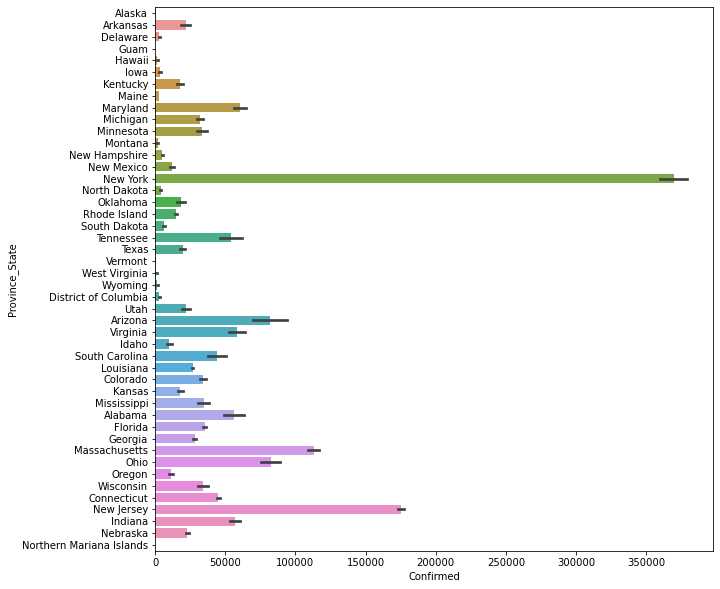

In [162]:
plt.subplots(figsize=(10,10))
sns.barplot(x="Confirmed",y="Province_State",data=df)

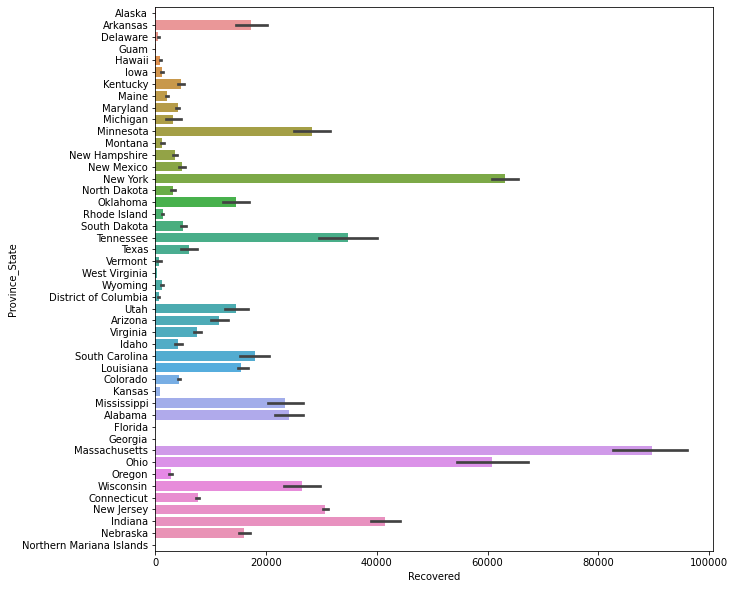

In [163]:
plt.subplots(figsize=(10,10))
sns.barplot(x="Recovered",y="Province_State",data=df)

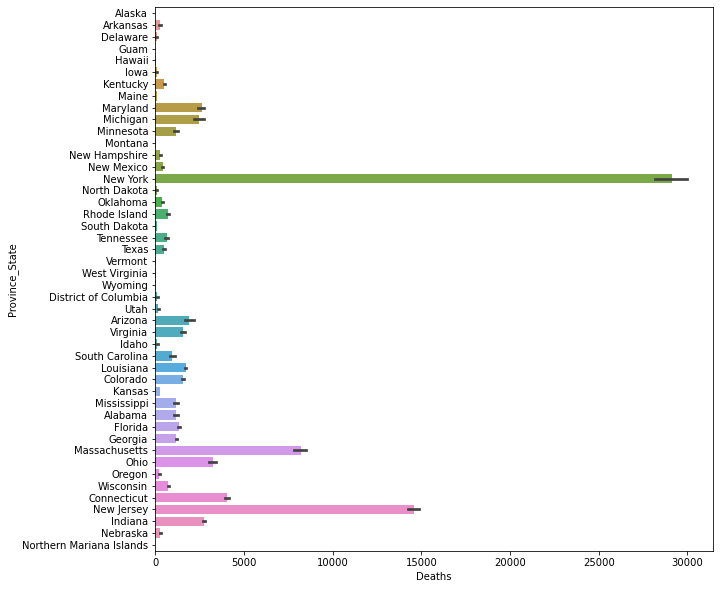

In [164]:
plt.subplots(figsize=(10,10))
sns.barplot(x="Deaths",y="Province_State",data=df)

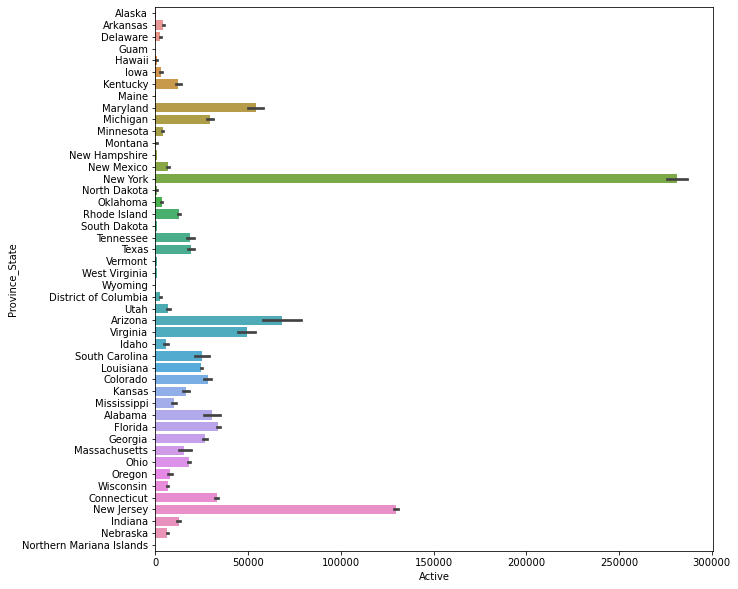

In [165]:
plt.subplots(figsize=(10,10))
sns.barplot(x="Active",y="Province_State",data=df)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1617ef68bb0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1617ef68a30>,
 'cmins': <matplotlib.collections.LineCollection at 0x1617ef77040>,
 'cbars': <matplotlib.collections.LineCollection at 0x1617ef77310>}

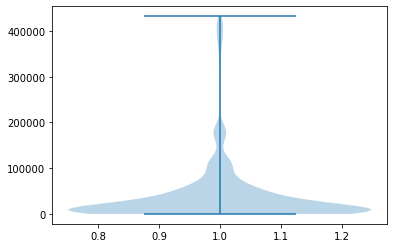

In [166]:
plt.violinplot(df["Confirmed"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1617efbc490>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1617efbc2e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1617efbc310>,
 'cbars': <matplotlib.collections.LineCollection at 0x1617efbc8e0>}

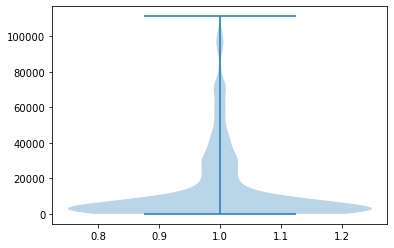

In [167]:
plt.violinplot(df["Recovered"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1617f00c880>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1617f00c6d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1617f00c700>,
 'cbars': <matplotlib.collections.LineCollection at 0x1617f00ccd0>}

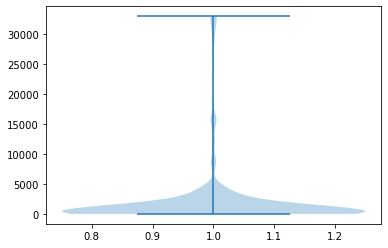

In [168]:
plt.violinplot(df["Deaths"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1617f06c160>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1617f05cfa0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1617f06c5b0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1617f06c880>}

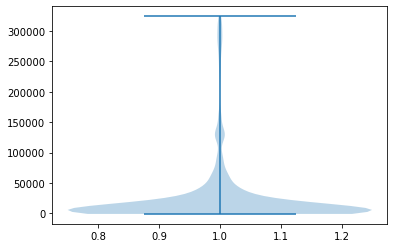

In [169]:
plt.violinplot(df["Active"])

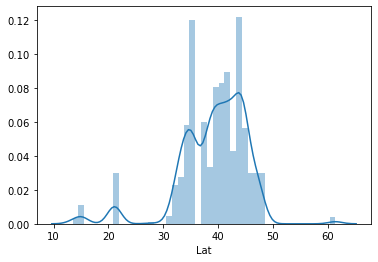

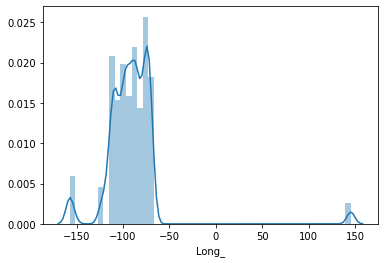

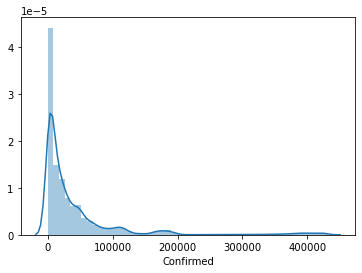

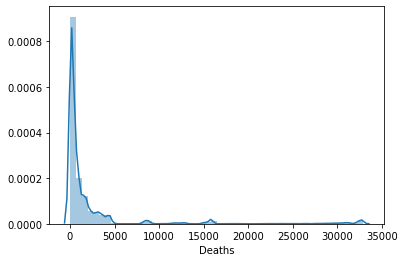

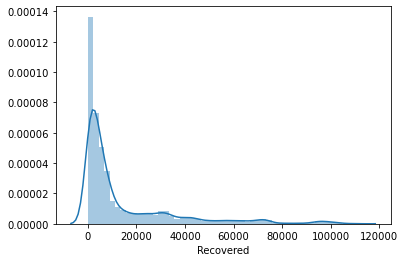

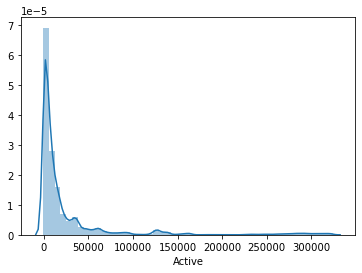

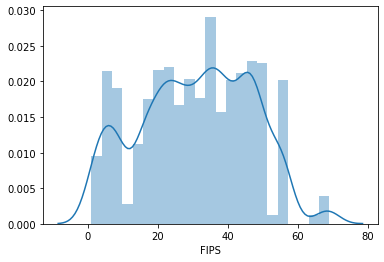

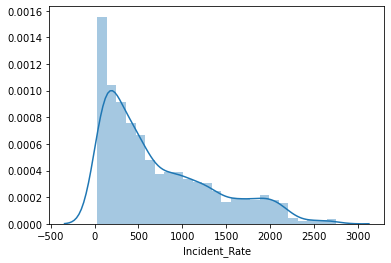

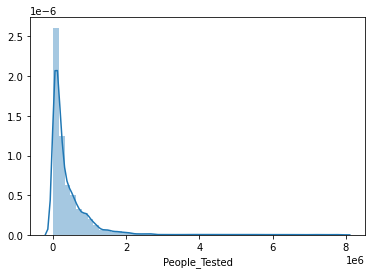

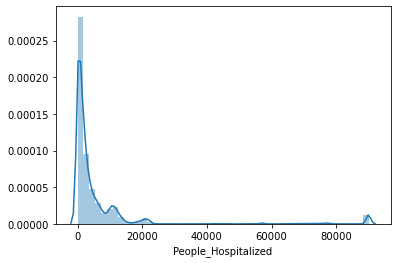

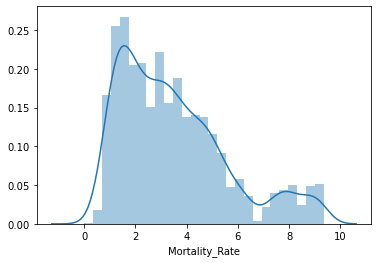

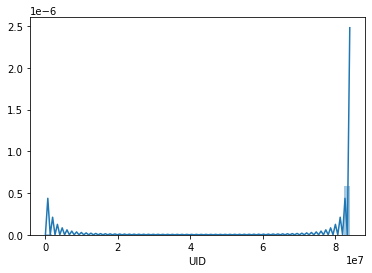

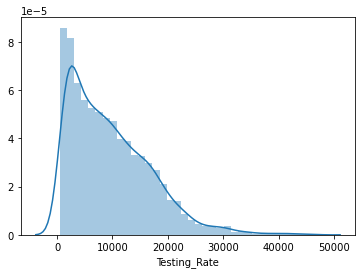

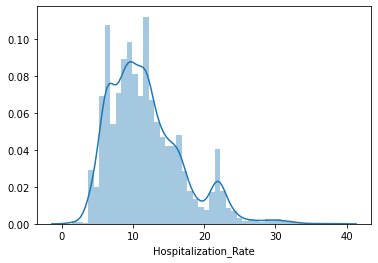

In [170]:
# checking wheather data is normally distributed or not
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()
    


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001617F097100>,
      dtype=object)

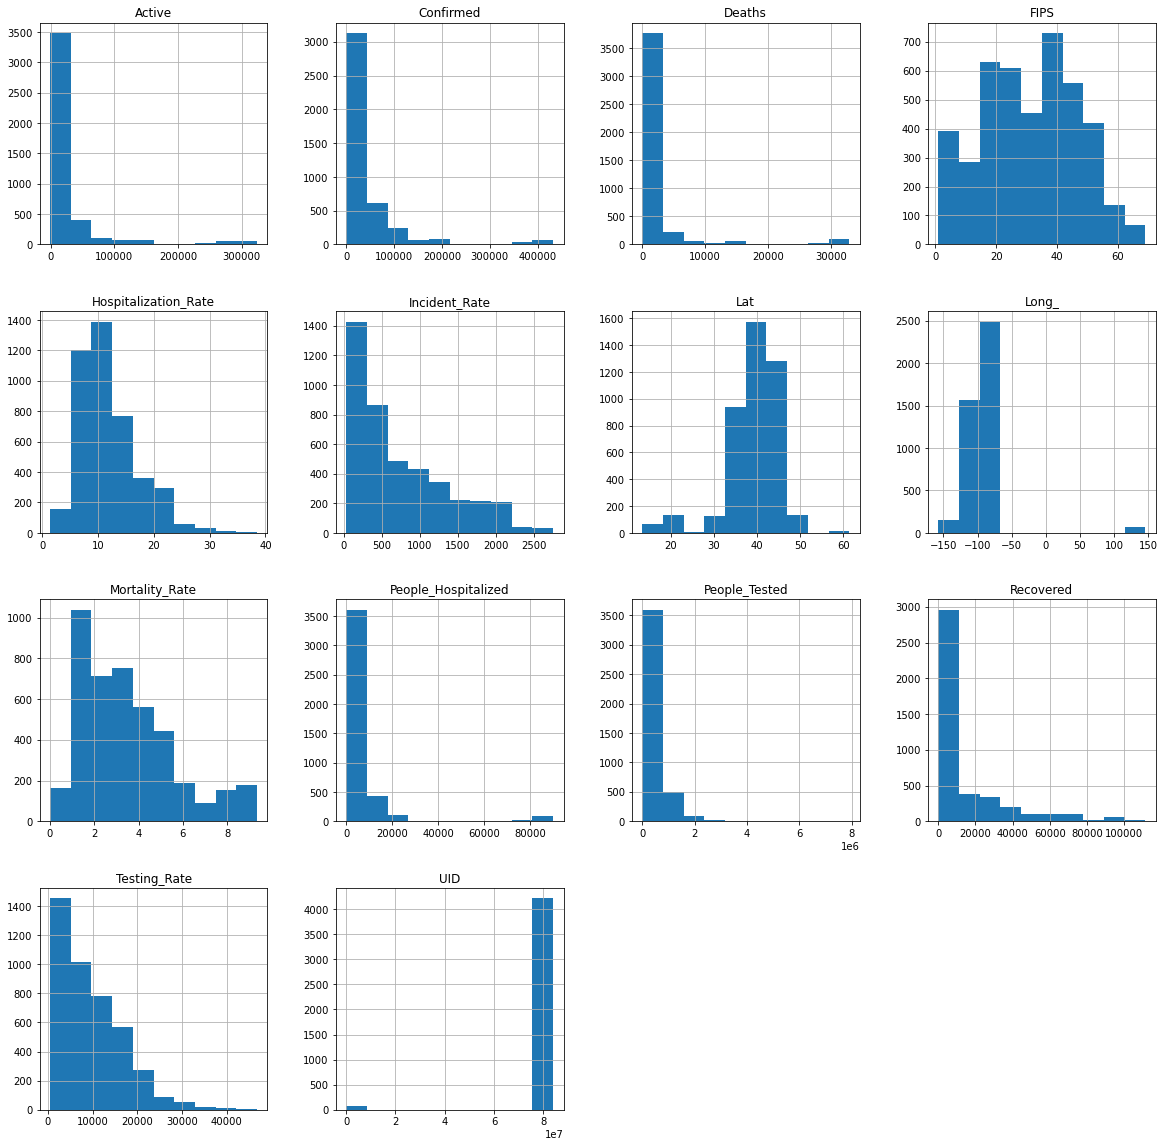

In [171]:
df.hist(figsize=(20,20))

Lat                        AxesSubplot(0.125,0.657941;0.0945122x0.222059)
Long_                   AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
Confirmed               AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Deaths                  AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
Recovered               AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
Active                  AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
FIPS                    AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
Incident_Rate              AxesSubplot(0.125,0.391471;0.0945122x0.222059)
People_Tested           AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
People_Hospitalized     AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
Mortality_Rate          AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
UID                     AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
Testing_Rate            AxesSubplot(0.692073,0.391471;0.0945122x0.222059)
Hospitalization_Rate    AxesSubplot(0.

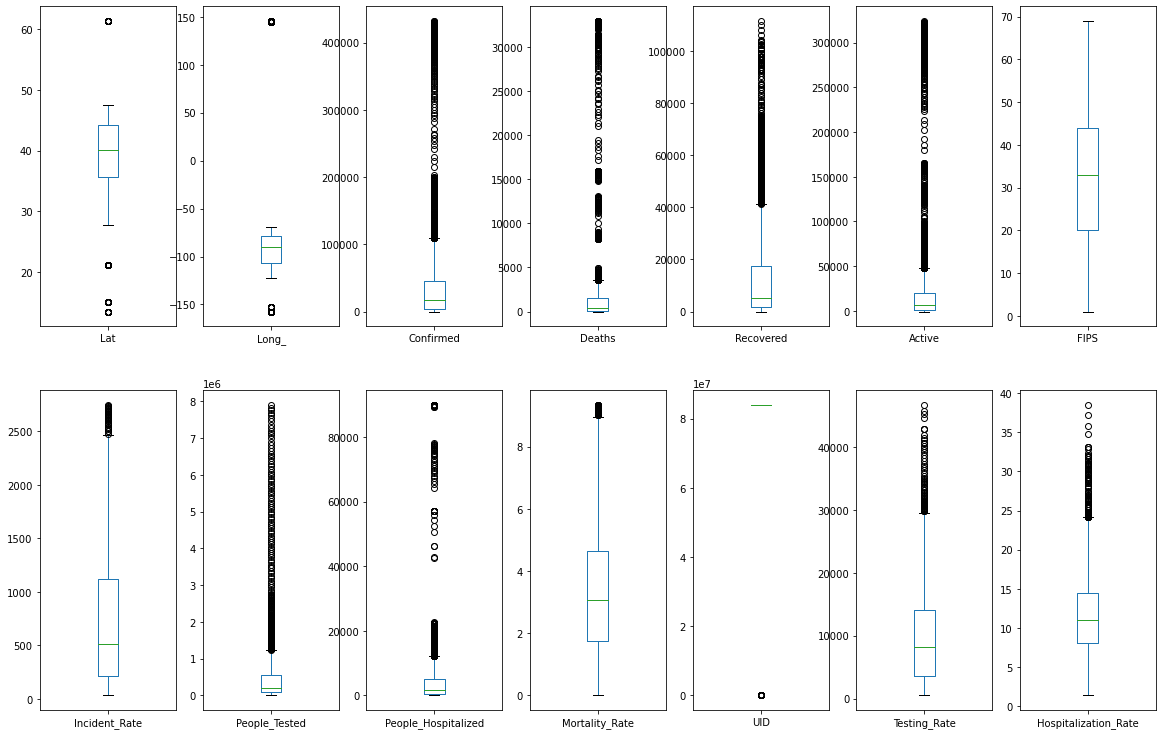

In [172]:


df.plot(kind='box',subplots=True,layout=(3,7),figsize=(20,20))

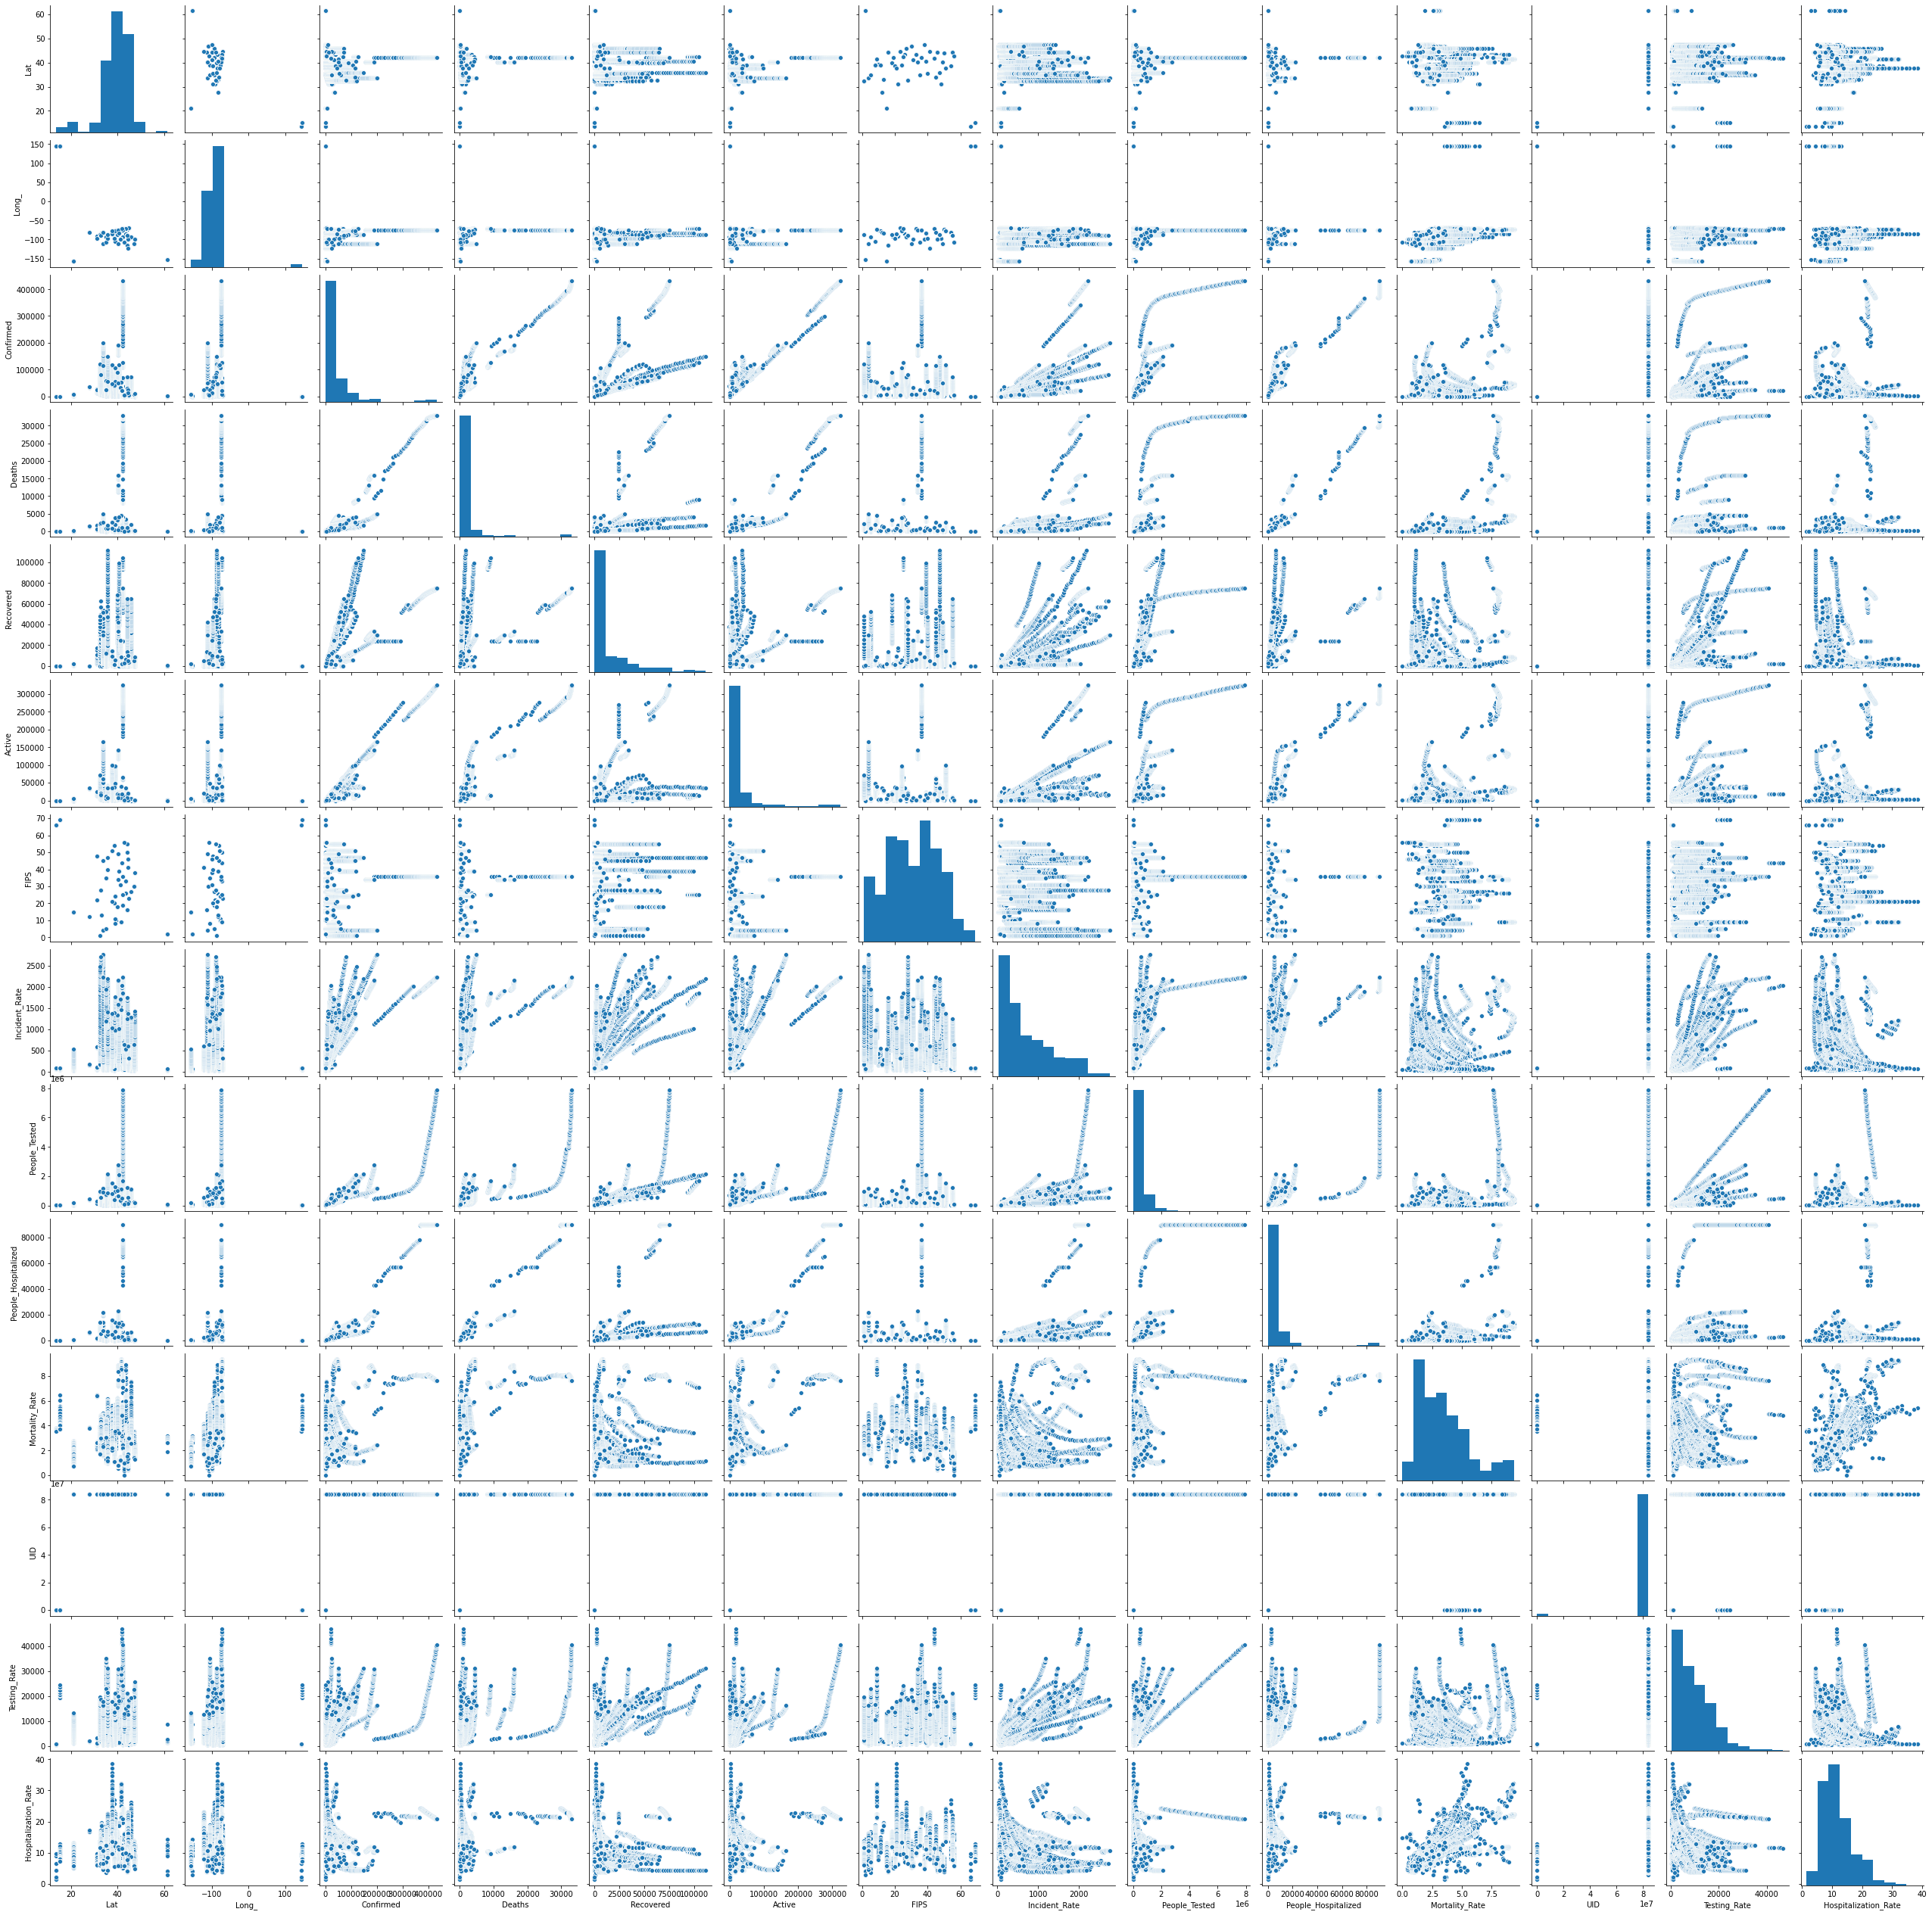

In [173]:
sns.pairplot(df)

In [174]:
df.drop(columns=["Province_State"],inplace=True)
df.drop(columns=["Country_Region"],inplace=True)
df.drop(columns=["Lat"],inplace=True)
df.drop(columns=["Long_"],inplace=True)
df.drop(columns=["Last_Update"],inplace=True)


In [175]:
df.head()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
1,272.0,8.0,66.0,264.0,2.0,45.504049,8038.0,31.0,2.941176,84000002.0,USA,1344.711576,11.397059
3,1280.0,27.0,367.0,1253.0,5.0,49.439423,19722.0,130.0,2.109375,84000005.0,USA,761.753354,10.156250
7,1625.0,35.0,191.0,1590.0,10.0,166.878217,11103.0,190.0,2.153846,84000010.0,USA,1140.214672,11.692308
13,133.0,5.0,58.0,128.0,66.0,80.984479,826.0,13.0,3.759398,316.0,GUM,502.956238,9.774436
14,499.0,9.0,300.0,490.0,15.0,35.245440,17968.0,44.0,1.803607,84000015.0,USA,1269.118355,8.817635


In [176]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['ISO3','UID']
for val in list1:
     df[val]=le.fit_transform(df[val].astype(str))

# Stastical Analysis

In [177]:
df.describe()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4.278000e+03,4278.000000,4278.000000,4278.00000,4278.000000,4278.000000,4278.000000
mean,41674.196821,2132.255727,14306.351332,25492.805049,30.879149,730.138425,4.649742e+05,5960.485507,3.479323,24.45208,1.980832,9646.892498,11.842184
std,72086.535095,5556.533651,20941.709153,54548.786049,15.931336,626.671247,8.044725e+05,14702.781719,2.125467,12.57062,0.162132,7307.908507,5.194200
min,31.000000,0.000000,0.000000,-989.000000,1.000000,32.771004,8.260000e+02,2.000000,0.000000,0.00000,0.000000,502.956238,1.418440
25%,4304.500000,107.000000,1641.750000,1381.250000,20.000000,213.829674,8.090775e+04,426.250000,1.744786,14.00000,2.000000,3601.131655,8.148313
50%,16714.500000,401.500000,5060.000000,6882.000000,33.000000,517.412875,2.089230e+05,1746.000000,3.055633,26.00000,2.000000,8194.333959,10.995956
75%,46205.500000,1497.500000,17547.000000,19859.250000,44.000000,1118.500254,5.474028e+05,5095.750000,4.638154,35.00000,2.000000,14066.855540,14.535716
max,432131.000000,32926.000000,111416.000000,324355.000000,69.000000,2749.646675,7.905071e+06,89995.000000,9.351050,45.00000,2.000000,46780.559220,38.501190


<function matplotlib.pyplot.show(*args, **kw)>

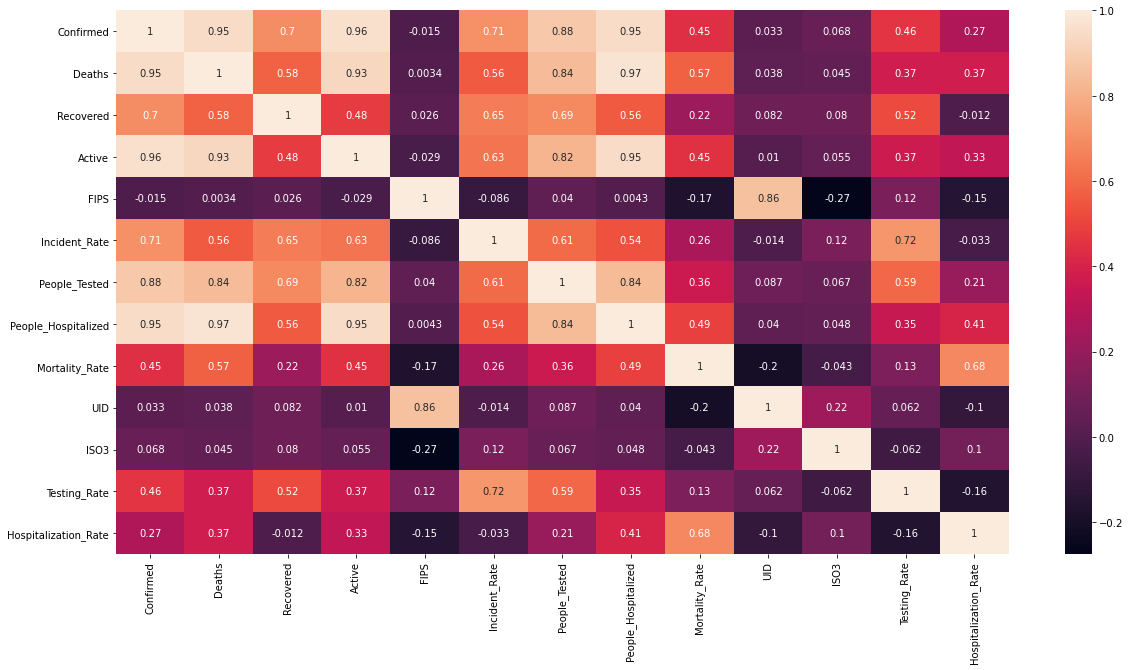

In [178]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show

In [179]:
df.corr()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
Confirmed,1.000000,0.948218,0.697400,0.962322,-0.015120,0.707109,0.884126,0.949725,0.445415,0.033333,0.068231,0.461739,0.273926
Deaths,0.948218,1.000000,0.577992,0.934766,0.003423,0.560953,0.840734,0.970689,0.573180,0.037787,0.045310,0.374334,0.373865
Recovered,0.697400,0.577992,1.000000,0.479156,0.026365,0.652299,0.689395,0.558187,0.219070,0.081982,0.080462,0.521636,-0.012421
Active,0.962322,0.934766,0.479156,1.000000,-0.029299,0.627296,0.817425,0.948081,0.450265,0.010281,0.055133,0.367301,0.332817
FIPS,-0.015120,0.003423,0.026365,-0.029299,1.000000,-0.086275,0.039777,0.004281,-0.168448,0.858602,-0.274265,0.121016,-0.149574
Incident_Rate,0.707109,0.560953,0.652299,0.627296,-0.086275,1.000000,0.606539,0.538114,0.259710,-0.013538,0.122405,0.723046,-0.032668
People_Tested,0.884126,0.840734,0.689395,0.817425,0.039777,0.606539,1.000000,0.838832,0.360857,0.086765,0.067213,0.594264,0.212350
People_Hospitalized,0.949725,0.970689,0.558187,0.948081,0.004281,0.538114,0.838832,1.000000,0.489705,0.040489,0.047901,0.351024,0.406204
Mortality_Rate,0.445415,0.573180,0.219070,0.450265,-0.168448,0.259710,0.360857,0.489705,1.000000,-0.200034,-0.043498,0.131370,0.681790
UID,0.033333,0.037787,0.081982,0.010281,0.858602,-0.013538,0.086765,0.040489,-0.200034,1.000000,0.224284,0.062359,-0.103735


# Removing Outliers

In [180]:
print("The shape before removing outliers and skewness",df.shape)
print("skewness before removing outliers")
print(df.skew())
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print("new shape after removing outliers",df.shape)
print("skewness after removing outliers")
print(df.skew())

The shape before removing outliers and skewness (4278, 13)
skewness before removing outliers
Confirmed               3.474532
Deaths                  4.280194
Recovered               2.172768
Active                  3.716536
FIPS                   -0.067500
Incident_Rate           0.958362
People_Tested           5.083113
People_Hospitalized     4.776916
Mortality_Rate          0.951817
UID                    -0.221221
ISO3                   -9.413173
Testing_Rate            1.121087
Hospitalization_Rate    1.057759
dtype: float64
new shape after removing outliers (3890, 13)
skewness after removing outliers
Confirmed               2.298077
Deaths                  4.711630
Recovered               1.868538
Active                  2.856424
FIPS                   -0.164768
Incident_Rate           1.072660
People_Tested           2.262662
People_Hospitalized     2.435856
Mortality_Rate          1.102741
UID                    -0.187556
ISO3                    0.000000
Testing_Rate          

# Splitting Data into target and Input

In [181]:
x=df.drop(['Hospitalization_Rate'],axis=1)
y=df['Hospitalization_Rate']

In [182]:
x.head()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate
1,272.0,8.0,66.0,264.0,2.0,45.504049,8038.0,31.0,2.941176,3,2,1344.711576
3,1280.0,27.0,367.0,1253.0,5.0,49.439423,19722.0,130.0,2.109375,5,2,761.753354
7,1625.0,35.0,191.0,1590.0,10.0,166.878217,11103.0,190.0,2.153846,8,2,1140.214672
14,499.0,9.0,300.0,490.0,15.0,35.245440,17968.0,44.0,1.803607,12,2,1269.118355
18,1587.0,41.0,674.0,1546.0,19.0,60.556040,17592.0,129.0,2.583491,15,2,671.267705


In [183]:
y.head()

1     11.397059
3     10.156250
7     11.692308
14     8.817635
18     8.128544
Name: Hospitalization_Rate, dtype: float64

In [184]:
print(x.shape)
print(y.shape)

(3890, 12)
(3890,)


In [185]:
y=y.values.reshape(-1,1)

In [186]:
y.shape

(3890, 1)

In [187]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x=scaler.fit_transform(x)

# Importing Necessary Libraries

In [196]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [197]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [198]:
lreg=LinearRegression()
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 85 is 0.757942877085324


In [199]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=100,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=20,scoring="r2").std())


Mean r2 score for Linear Regression: 0.6874075602903501
standard deviation in r2 score for Linear Regression 0.1501497387617626


In [207]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'n_neighbors': 2}


{'alpha': 0.01}


{'criterion': 'mse'}




In [210]:
knn=KNeighborsRegressor(n_neighbors=2)
i=maxr2_score(knn,x,y)
print("\n")

print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")

lsreg=Lasso(alpha=0.01)
i=maxr2_score(lsreg,x,y)
print("\n")

print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")


dtr=DecisionTreeRegressor(criterion = 'mse')
i=maxr2_score(dtr,x,y)
print("\n")

print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtr,x,y,cv=5,scoring="r2").std())

max r2 score corresponding to 67 is 0.9940398065369617


Mean r2 score for KNeighbor  Regression: 0.8306094759011682
standard deviation in r2 score for KNeighbor   Regression 0.20161057258699128

___________________________________________________________________________________________________________

max r2 score corresponding to 85 is 0.722942412202128


Mean r2 score for Lasso Regression: 0.6396607618526394
standard deviation in r2 score for Lasso Regression 0.15194716195396596

___________________________________________________________________________________________________________

max r2 score corresponding to 88 is 0.9921454119997467


Mean r2 score for DecisionTreeRegressor : 0.717506511025116
standard deviation in r2 score for DecisionTreeRegressor 0.2397224932030655


In [205]:
rfr=RandomForestRegressor()
parameters={"n_estimators":[10,20,50,100,120,150,200],"max_features": ["auto", "sqrt", "log2"]}
clf=GridSearchCV(rfr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [209]:
rfr=RandomForestRegressor(max_features='log2',n_estimators=100)
i=maxr2_score(rfr,x,y)

max r2 score corresponding to 44 is 0.9922587556060366


In [211]:
print("Mean r2 score for RandomForestRegressor :",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())

Mean r2 score for RandomForestRegressor : 0.8360622370820829
standard deviation in r2 score for RandomForestRegressor  0.1587485377303733


In [212]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x,y)
    print(sv.score(x,y))

0.6814363215034105
0.6282267967840144
0.7729848288168074


In [213]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,20,50,100,120,150,200]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [214]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=200)
i=maxr2_score(gbr,x,y)

max r2 score corresponding to 96 is 0.7769108045850692


In [215]:
print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting Regression: 0.6205206536794201
standard deviation in r2 score for gradient boosting Regression 0.15563526750720402


# From the above analysis w.r.t r2_score RandomForestRegressor is performing best¶

In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= 44 ,test_size=0.20)
rfr=RandomForestRegressor(max_features='sqrt',n_estimators=500)
rfr.fit(x,y)
y_pred=rfr.predict(x_test)
y_pred

array([ 8.35191934, 22.14394022, 15.48754082, 17.55979541,  4.4422249 ,
        6.92578889,  8.33313649, 11.90703003,  8.3408147 ,  5.59382764,
       11.3312663 , 12.13348712,  9.76753749, 17.14544075, 15.45769807,
       18.66654336,  9.34237557,  7.93479164,  5.93732162,  9.06776046,
       11.54134973, 16.46103268,  5.96659912, 12.2933233 , 10.53620542,
        7.36050448, 13.11609044,  5.51013355,  5.89196218,  5.49180457,
       15.00259165, 13.74234618, 16.63958287, 11.12390277,  9.10633032,
       11.22555325,  9.79605033, 12.13220936, 15.19779777, 11.90306607,
       15.56259626, 11.24541618,  9.82071627, 12.55566354, 15.4886451 ,
        6.82542123, 18.24108467, 11.90603381, 13.83230301, 15.05659842,
       11.68376167,  8.26111677, 13.46064475, 13.85563308, 12.83983119,
       14.7441219 , 12.22809147,  9.83551751, 15.35352744,  6.41738444,
       16.41421764,  5.84231198,  6.5545855 , 18.21474849,  8.42216656,
       15.20899236, 22.17745683,  6.0114553 ,  8.55535488,  5.90

In [223]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  0.12252970577568699
r2_score is: 0.9992244142015277


# Saving the Model

In [224]:
import joblib
joblib.dump(rfr,"covid_dataset.pkl")

['covid_dataset.pkl']